In [145]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Normalization
from keras import regularizers
from sklearn.metrics import confusion_matrix, classification_report
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [71]:
dataset = mnist.load_data('mnist.db')

In [72]:
train, test = dataset

In [162]:
Xtrain, Ytrain = train
len(Xtrain)
print(Ytrain)
Ytrain = to_categorical(Ytrain)
print(Ytrain[:,0])

[5 0 4 ... 5 6 8]
[0. 1. 0. ... 0. 0. 0.]


In [163]:
Xtest, Ytest = test
len(Xtest)

10000

In [164]:
print(Xtrain.shape)
Xtrain = Xtrain.reshape(-1,28*28)
Xtest = Xtest.reshape(-1,28*28)
print(Xtrain.shape)


(60000, 28, 28)
(60000, 784)


In [165]:
norm_l = Normalization(axis=-1)
norm_l.adapt(Xtrain)  # learns mean, variance

In [166]:
model = Sequential([
    norm_l,
    Dense(units=512,activation='relu',input_shape=(784,),kernel_regularizer = regularizers.L2(1e-6)),
    Dense(units=256,activation='relu',kernel_regularizer = regularizers.L2(1e-6)),
    Dense(units=128,activation='relu',kernel_regularizer = regularizers.L2(1e-6)),
    Dense(units=10,activation='softmax',kernel_regularizer = regularizers.L2(1e-6)),
                   ])
model.compile(loss='categorical_crossentropy',optimizer = Adam(),metrics=['accuracy'])

In [167]:
history = model.fit(Xtrain,Ytrain,epochs=10,batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2428 - accuracy: 0.9293 - val_loss: 0.1428 - val_accuracy: 0.9588
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1207 - accuracy: 0.9650 - val_loss: 0.1360 - val_accuracy: 0.9660
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0931 - accuracy: 0.9734 - val_loss: 0.1349 - val_accuracy: 0.9636
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0724 - accuracy: 0.9805 - val_loss: 0.1193 - val_accuracy: 0.9693
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0640 - accuracy: 0.9823 - val_loss: 0.1389 - val_accuracy: 0.9687
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0557 - accuracy: 0.9844 - val_loss: 0.1243 - val_accuracy: 0.9718
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0498 - accuracy: 0.9870 - val_loss: 0.1308 - val_accuracy:

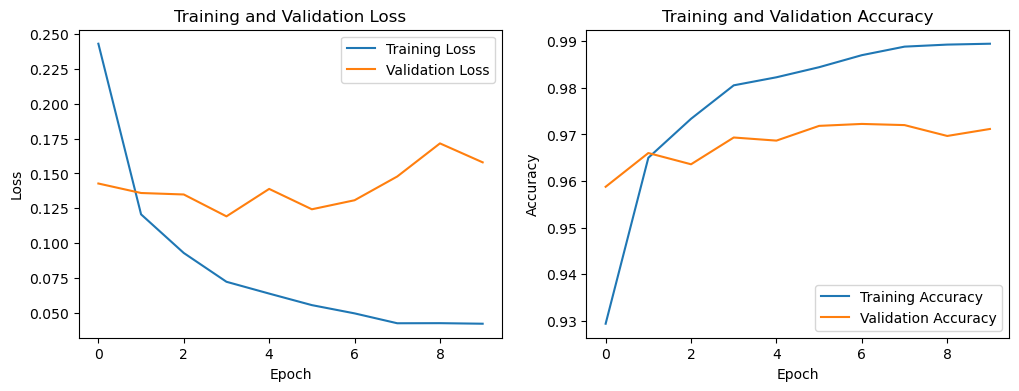

In [168]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()


313/313 [==============================] - 0s 1ms/step


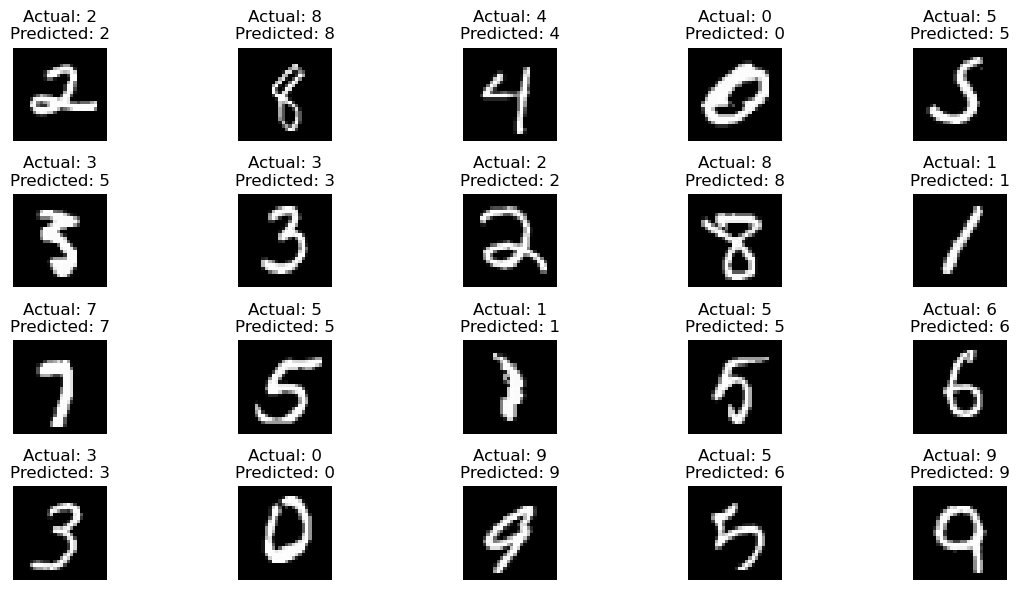

In [169]:
predictions = model.predict(Xtest)
predicted_labels = np.argmax(predictions, axis=1)


num_samples_to_display = 20
sample_indices = np.random.choice(len(Xtest), num_samples_to_display, replace=False)

# Create a figure to display the comparison
plt.figure(figsize=(12, 6))

for i, sample_index in enumerate(sample_indices):
    plt.subplot(4, 5, i + 1)
    plt.imshow(Xtest[sample_index].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {Ytest[sample_index]}\nPredicted: {predicted_labels[sample_index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

313/313 [==============================] - 0s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.94      0.98      0.96      1010
           4       0.94      0.98      0.96       982
           5       0.97      0.97      0.97       892
           6       0.99      0.97      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.93      0.95       974
           9       0.98      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



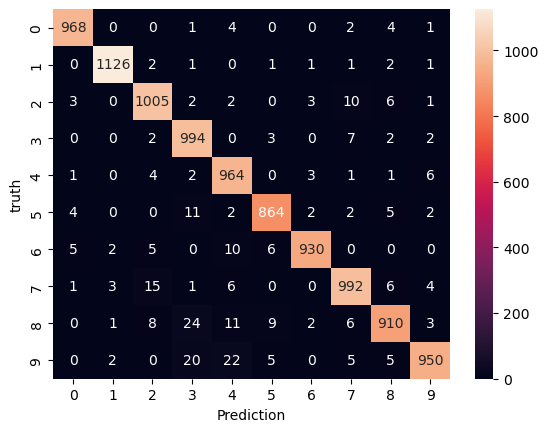

In [161]:
Ypred = model.predict(Xtest)
Ypred_labels = np.argmax(Ypred, axis=1)
confusion = confusion_matrix(Ytest, Ypred_labels)
classification_report_str = classification_report(Ytest, Ypred_labels)

sn.heatmap(confusion,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('truth')

print("Classification Report:\n", classification_report_str)